# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [3]:
import plotly.express as px
from plotly import graph_objects

import yfinance as yf
import pandas as pd
import numpy as np

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [105]:
%%time

asset = ['AAPL', 'META', 'NVDA']
date_time = '2023-07-30'

asset_finance = yf.download(asset, start=date_time).reset_index()

asset_finance

<timed exec>:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  3 of 3 completed

CPU times: total: 93.8 ms
Wall time: 870 ms


Price        Date       Close                                High              \
Ticker                   AAPL        META        NVDA        AAPL        META   
0      2023-07-31  194.502609  316.861694   46.700260  194.542221  323.883172   
1      2023-08-01  193.670914  320.949219   46.478394  194.779806  322.371439   
2      2023-08-02  190.670944  312.595093   44.241776  193.245161  316.652849   
3      2023-08-03  189.274933  311.481201   44.487621  190.463034  314.226152   
4      2023-08-04  180.185944  309.034607   44.652519  185.522512  316.672696   
..            ...         ...         ...         ...         ...         ...   
497    2025-07-24  213.759995  714.799988  173.740005  215.690002  723.619995   
498    2025-07-25  213.880005  712.679993  173.500000  215.240005  720.650024   
499    2025-07-28  214.050003  717.630005  176.750000  214.850006  724.739990   
500    2025-07-29  211.270004  700.000000  175.509995  214.809998  724.469971   
501    2025-07-30  209.050003  695.210022  179.270004  212.389999  708.500000   

Price                      Low                                Open  \
Ticker        NVDA        AAPL        META        NVDA        AAPL   
0        47.101015  193.324403  315.857195   46.477398  194.116476   
1        46.871153  193.344183  312.943153   45.998689  194.294673   
2        45.811808  189.948185  308.955058   43.360318  193.106550   
3        45.090251  188.799695  308.238978   43.773061  189.670977   
4        45.613926  180.116630  308.507500   44.365697  183.680950   
..             ...         ...         ...         ...         ...   
497     173.830002  213.529999  714.000000  171.300003  213.899994   
498     174.720001  213.399994  711.900024  172.960007  214.699997   
499     177.000000  213.059998  712.679993  173.970001  214.029999   
500     179.380005  210.820007  699.909973  175.020004  214.179993   
501     179.889999  207.720001  691.200073  176.039993  211.895004   

Price                              Volume                       
Ticker        META        NVDA       AAPL      META       NVDA  
0       321.923919   46.725246   38824100  25799600  251055000  
1       315.807444   46.431422   35175100  22817900  237858000  
2       316.264962   45.802815   50389300  20461100  530142000  
3       308.238978   43.773061   61235200  15180200  324176000  
4       313.241508   44.957332  115956800  17612800  362666000  
..             ...         ...        ...       ...        ...  
497     717.049988  172.440002   46022600  10920800  128984600  
498     716.919983  173.610001   40268800   8271700  122316800  
499     715.200012  174.020004   37858000   8715700  140023500  
500     720.000000  177.960007   51411700  13267000  154077500  
501     708.000000  176.550003   43533667  21245149  166546229  

[502 rows x 16 columns]

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [107]:
amplitude = asset_finance['High'] - asset_finance['Low']
amplitude['Date'] = asset_finance['Date']
ampli = amplitude.reset_index()

ampli

Ticker,index,AAPL,META,NVDA,Date
0,0,1.217818,8.025977,0.623617,2023-07-31
1,1,1.435623,9.428286,0.872464,2023-08-01
2,2,3.296976,7.697790,2.451491,2023-08-02
3,3,1.663339,5.987174,1.317190,2023-08-03
4,4,5.405882,8.165196,1.248229,2023-08-04
...,...,...,...,...,...
497,497,2.160004,9.619995,2.529999,2025-07-24
498,498,1.840012,8.750000,1.759995,2025-07-25
499,499,1.790009,12.059998,3.029999,2025-07-28
500,500,3.989990,24.559998,4.360001,2025-07-29


In [113]:
df_to_melt = amplitude[['Date', 'META', 'AAPL', 'NVDA']]

# Derreter para formato longo
df_long = df_to_melt.melt(
    id_vars='Date',          # Coluna fixa
    var_name='Company',       # Nomes dos ativos viram coluna
    value_name='Amplitude'   # Valores das amplitudes
)

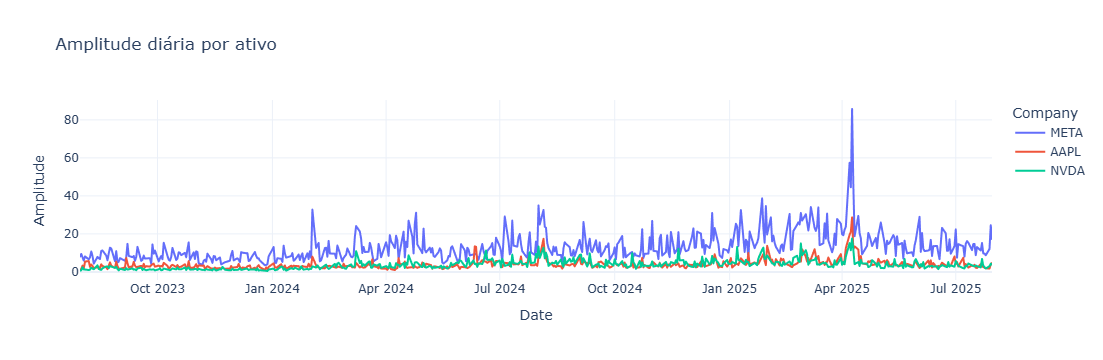

In [111]:
fig = px.line(
    df_long,
    x='Date',
    y='Amplitude',
    color='Company',
    template='plotly_white',
    title='Amplitude diária por ativo'
)

fig.show()